In [102]:
import pandas as pd
import numpy as np

In [103]:
data=pd.read_csv("diabetes_prediction_dataset.csv")

In [104]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [105]:
data["hypertension"].value_counts()

0    92515
1     7485
Name: hypertension, dtype: int64

In [106]:
data["heart_disease"].value_counts()

0    96058
1     3942
Name: heart_disease, dtype: int64

In [107]:
data.shape

(100000, 9)

In [108]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [109]:
data["gender"].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [110]:
data["smoking_history"].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [111]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [112]:
data["smoking_history"].replace("No Info",np.nan,inplace=True)

In [113]:
data["smoking_history"].fillna("never",inplace=True)

In [114]:
data["smoking_history"].value_counts()

never          70911
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [115]:
import seaborn as sns

In [116]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data[["bmi","HbA1c_level","blood_glucose_level"]]), columns=["bmi","HbA1c_level","blood_glucose_level"])

In [117]:
df_scaled

,bmi,HbA1c_level,blood_glucose_level
0,0.177171,0.563636,0.272727
1,0.202031,0.563636,0.000000
2,0.202031,0.400000,0.354545
3,0.156863,0.272727,0.340909
4,0.118231,0.236364,0.340909
...,...,...,...
99995,0.202031,0.490909,0.045455
99996,0.085901,0.545455,0.090909
99997,0.207983,0.400000,0.340909
99998,0.296569,0.090909,0.090909


In [118]:
data[["bmi", "HbA1c_level", "blood_glucose_level"]] = df_scaled


In [119]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,0.177171,0.563636,0.272727,0
1,Female,54.0,0,0,never,0.202031,0.563636,0.000000,0
2,Male,28.0,0,0,never,0.202031,0.400000,0.354545,0
3,Female,36.0,0,0,current,0.156863,0.272727,0.340909,0
4,Male,76.0,1,1,current,0.118231,0.236364,0.340909,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,never,0.202031,0.490909,0.045455,0
99996,Female,2.0,0,0,never,0.085901,0.545455,0.090909,0
99997,Male,66.0,0,0,former,0.207983,0.400000,0.340909,0
99998,Female,24.0,0,0,never,0.296569,0.090909,0.090909,0


In [120]:
data['hypertension'] = data['hypertension'].astype('category')
data['heart_disease'] = data['heart_disease'].astype('category')
data['diabetes'] = data['diabetes'].astype('category')

In [121]:
data = pd.get_dummies(data, columns=['gender','smoking_history'])


In [122]:
data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,0.177171,0.563636,0.272727,0,1,0,0,0,0,0,1,0
1,54.0,0,0,0.202031,0.563636,0.000000,0,1,0,0,0,0,0,1,0
2,28.0,0,0,0.202031,0.400000,0.354545,0,0,1,0,0,0,0,1,0
3,36.0,0,0,0.156863,0.272727,0.340909,0,1,0,0,1,0,0,0,0
4,76.0,1,1,0.118231,0.236364,0.340909,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,0.202031,0.490909,0.045455,0,1,0,0,0,0,0,1,0
99996,2.0,0,0,0.085901,0.545455,0.090909,0,1,0,0,0,0,0,1,0
99997,66.0,0,0,0.207983,0.400000,0.340909,0,0,1,0,0,0,1,0,0
99998,24.0,0,0,0.296569,0.090909,0.090909,0,1,0,0,0,0,0,1,0


In [124]:
data["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

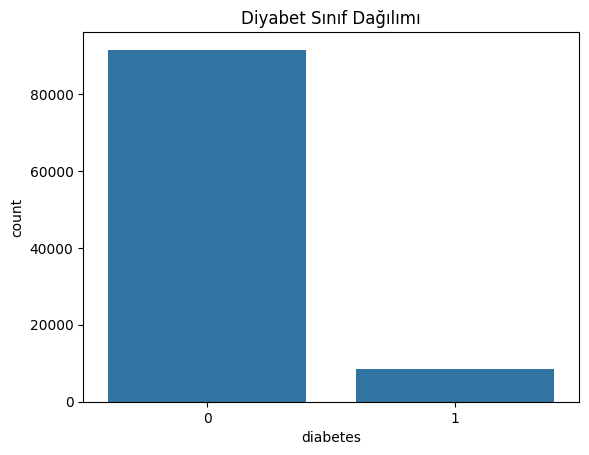

In [128]:
import matplotlib.pyplot as plt

sns.countplot(x='diabetes', data=data)
plt.title('Diyabet Sınıf Dağılımı')
plt.show()


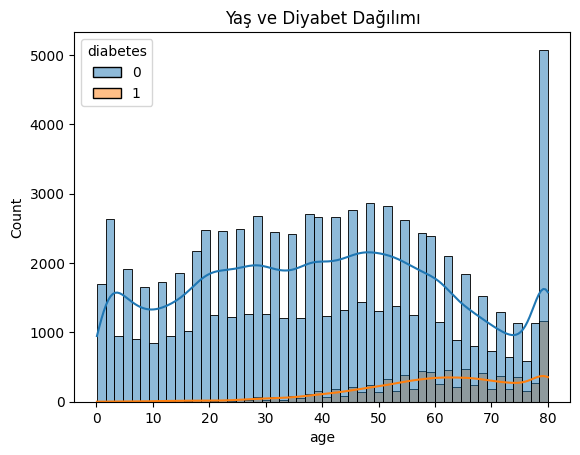

In [129]:
sns.histplot(x='age', hue='diabetes', data=data, kde=True)
plt.title('Yaş ve Diyabet Dağılımı')
plt.show()


diabetin en yüksek görüldüğü yaş 60 65 arası yaş.

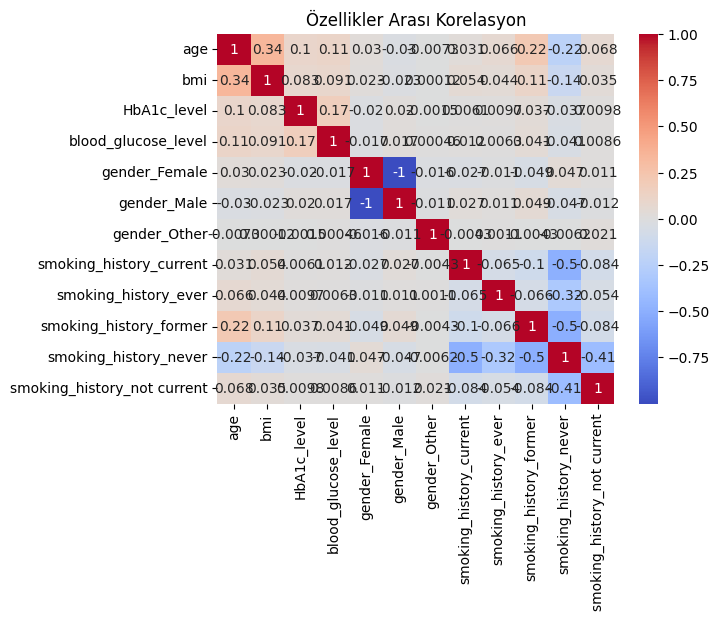

In [132]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Özellikler Arası Korelasyon')
plt.show()


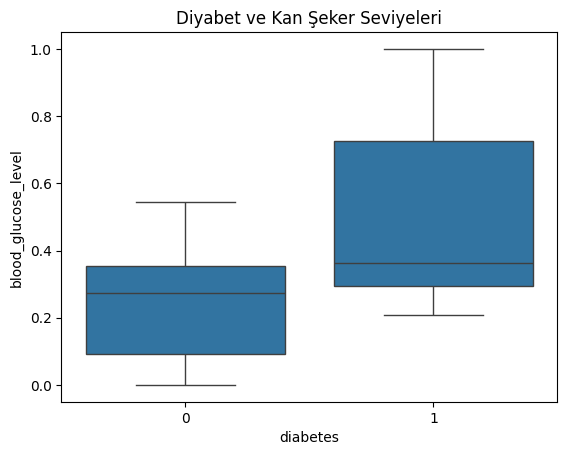

In [133]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('Diyabet ve Kan Şeker Seviyeleri')
plt.show()


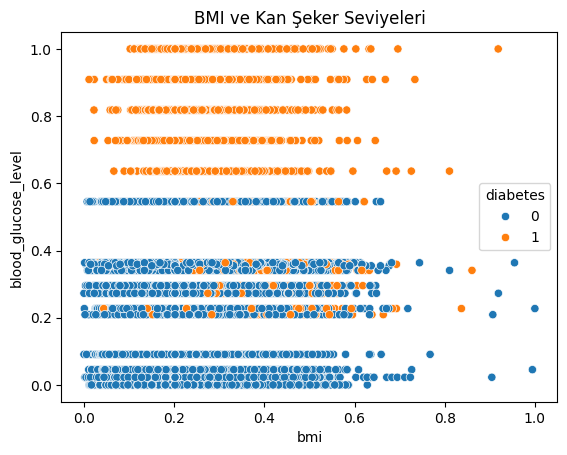

In [134]:
sns.scatterplot(x='bmi', y='blood_glucose_level', hue='diabetes', data=data)
plt.title('BMI ve Kan Şeker Seviyeleri')
plt.show()


In [137]:
# BMI ve Diabetes arasındaki Pearson korelasyon katsayısı
correlation = data['bmi'].corr(data['diabetes'])
print(f"Pearson Korelasyon Katsayısı: {correlation}")

Pearson Korelasyon Katsayısı: 0.2143574057995111


kan şekeri seviyesi ile diyabete yakalanma oranı doğrusal olsa da bmi değerleri ile diyabete yakalanma oranı arasında bir ilişki yok

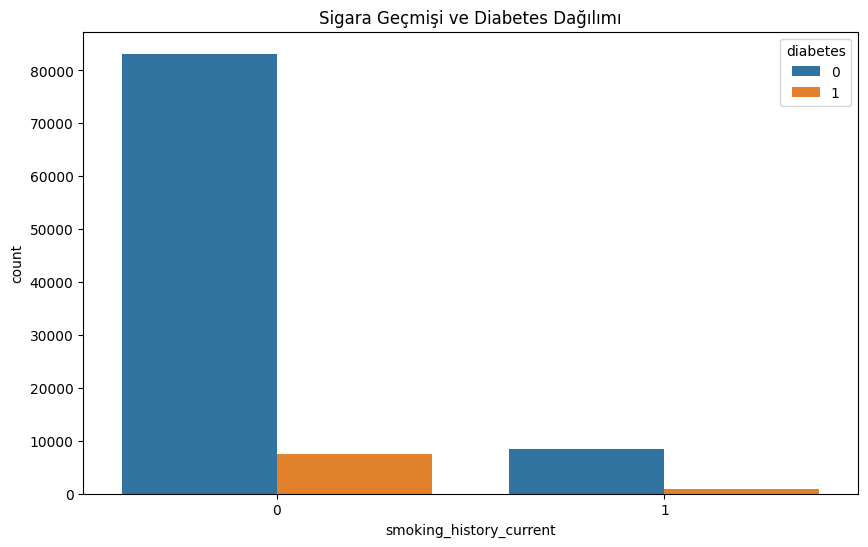

In [139]:

plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history_current', hue='diabetes', data=data)
plt.title('Sigara Geçmişi ve Diabetes Dağılımı')
plt.show()


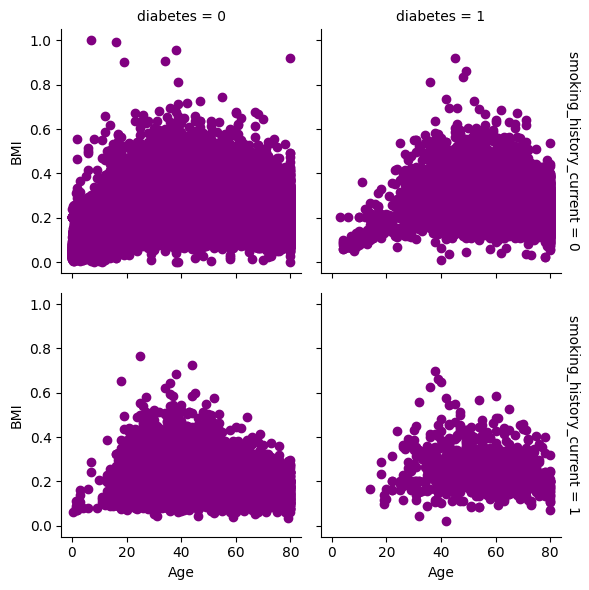

In [142]:
g = sns.FacetGrid(data, col='diabetes', row='smoking_history_current', margin_titles=True)
g.map(plt.scatter, 'age', 'bmi', color='purple')
g.set_axis_labels('Age', 'BMI')
plt.show()


Logistic Regression

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Veriyi özellikler ve hedef değişken olarak ayıralım
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modelini oluşturalım
model_lr = LogisticRegression()

# Modeli eğitelim
model_lr.fit(X_train, y_train)

# Test seti üzerinde modelin performansını değerlendirelim
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Lojistik Regresyon Modeli Doğruluğu: {accuracy_lr}")
print(classification_report(y_test, y_pred_lr))


Lojistik Regresyon Modeli Doğruluğu: 0.9585
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.60      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



c:\Users\kadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree

In [144]:
from sklearn.tree import DecisionTreeClassifier

# Karar Ağacı modelini oluşturalım
model_dt = DecisionTreeClassifier(random_state=42)

# Modeli eğitelim
model_dt.fit(X_train, y_train)

# Test seti üzerinde modelin performansını değerlendirelim
y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Karar Ağacı Modeli Doğruluğu: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))


Karar Ağacı Modeli Doğruluğu: 0.95225
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



SVM

In [145]:
from sklearn.svm import SVC

# Destek Vektör Makineleri modelini oluşturalım
model_svm = SVC(random_state=42)

# Modeli eğitelim
model_svm.fit(X_train, y_train)

# Test seti üzerinde modelin performansını değerlendirelim
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Destek Vektör Makineleri Modeli Doğruluğu: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))


Destek Vektör Makineleri Modeli Doğruluğu: 0.91475
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     18292
           1       1.00      0.00      0.00      1708

    accuracy                           0.91     20000
   macro avg       0.96      0.50      0.48     20000
weighted avg       0.92      0.91      0.87     20000



In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Veriyi özellikler ve hedef değişken olarak ayıralım
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi standartlaştıralım (önemli bir ön işleme adımı)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hedef değişkeni kategorik hale getirelim (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Sinir ağı modelini oluşturalım
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Çıkış katmanı, 2 sınıf için softmax aktivasyonu

# Modeli derleyelim
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitelim
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Test seti üzerinde modelin performansını değerlendirelim
_, accuracy_dl = model.evaluate(X_test, y_test)
print(f"Derin Öğrenme Modeli Doğruluğu: {accuracy_dl}")


Epoch 1/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.1282 - accuracy: 0.9555 - val_loss: 0.1163 - val_accuracy: 0.9617
Epoch 2/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.1069 - accuracy: 0.9632 - val_loss: 0.1010 - val_accuracy: 0.9655
Epoch 3/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.0969 - accuracy: 0.9669 - val_loss: 0.0948 - val_accuracy: 0.9676
Epoch 4/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.0904 - accuracy: 0.9691 - val_loss: 0.0917 - val_accuracy: 0.9672
Epoch 5/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.0870 - accuracy: 0.9699 - val_loss: 0.0888 - val_accuracy: 0.9697
Epoch 6/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.0857 - accuracy: 0.9707 - val_loss: 0.0872 - val_accuracy: 0.9711
Epoch 7/10
2000/2000 [==============================] - 3s 2ms/step - loss: 0.0848 - accuracy: 0.9708 - val_loss: 0.0877 - val_accuracy:

EN YÜKSEK SONUCU basit sinir ağı verdi.